In [14]:
from dotenv import load_dotenv
import os
import sys
import time
from IPython.display import display, Markdown
from datetime import datetime
from openai import OpenAI
from revealer import reveal
load_dotenv(override=True)

True

In [15]:
openai = OpenAI()   # auto-reads OPENAI_API_KEY

if not openai.api_key:
    print("OPENAI_API_KEY environment variable not set.")
    sys.exit(1)
else:
    print("OPENAI_API_KEY is set.")    

OPENAI_API_KEY is set.


In [16]:
# challenge = "Generate an SVG image of a cat sitting on a windowsill with a sunset in the background."
challenge = "Generate an SVG image of a boy and girl sitting in a car with a sunset in the background."
prompt = f"Generate an {challenge}, The SVG should be simple and stylized, should looks like cute painting. Include basic shapes and colors to represent the characters, car, and sunset. The SVG code should be valid and render correctly in modern web browsers. Please provide only the SVG code without any additional explanations or comments."
message = {"role": "user", "content": prompt}

In [17]:
def artist(model, effort=None):
    try:
        start = datetime.now()
        response = openai.chat.completions.create(
            model=model,
            messages=[message],
            reasoning_effort=effort,
            # max_tokens=1000,
            # temperature=0.7,
        )
        result = response.choices[0].message.content
        end = datetime.now()
        elapsed = (end - start).total_seconds()
        heading = f"### {model}\n**Time taken:** {elapsed // 60:.0f} minutes {elapsed % 60:.2f} seconds\n"
    except Exception as e:
        print(f"Error with model {model}: {e}")
        heading = f"### {model}\n**Error:** {e}\n"
        return heading + "```\nError generating SVG.\n```", None

    # Extract SVG from markdown code fences if present
    raw_output = result
    if "```" in result:
        # Extract content between code fences
        parts = result.split("```")
        for part in parts:
            if part.strip().startswith("<svg"):
                raw_output = part.strip()
                break
            elif part.strip().startswith("svg"):
                # Remove 'svg' language marker if present
                raw_output = part.strip()[3:].strip()
                break

    formatted_output = (
        heading + "```\n" + result + "\n```"
    )  # --> to be displayed in markdown format

    return formatted_output, raw_output  # --> give the two outputs as a tuple
    """
    This is called:

Separating presentation layer from data layer

First value → Presentation

Second value → Pure data
    """

In [18]:
results = [
    # artist("gpt-4.1", effort=None),
    artist("gpt-5.2", effort="low"),
    artist("gpt-5.2", effort="medium"),
    artist("gpt-5.2", effort="high"),
]

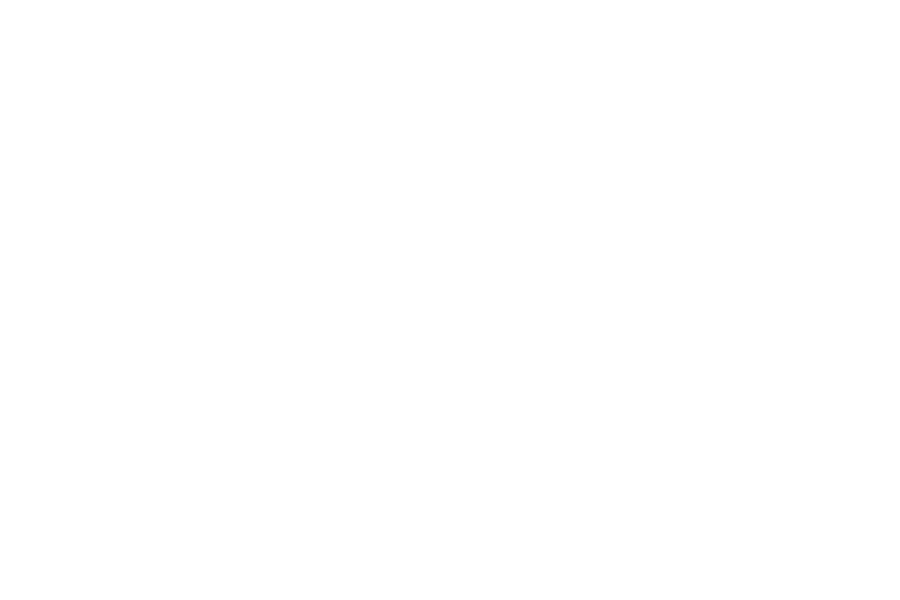

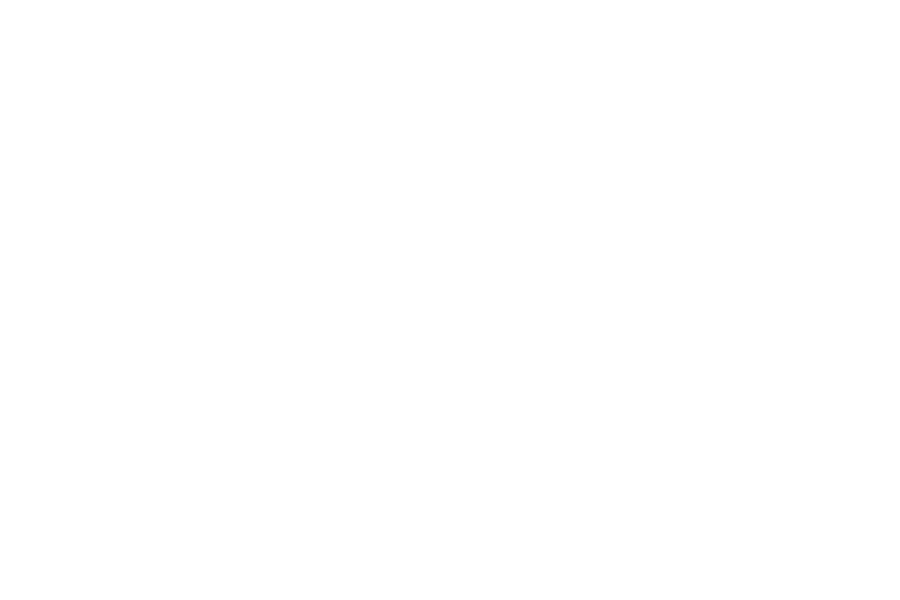

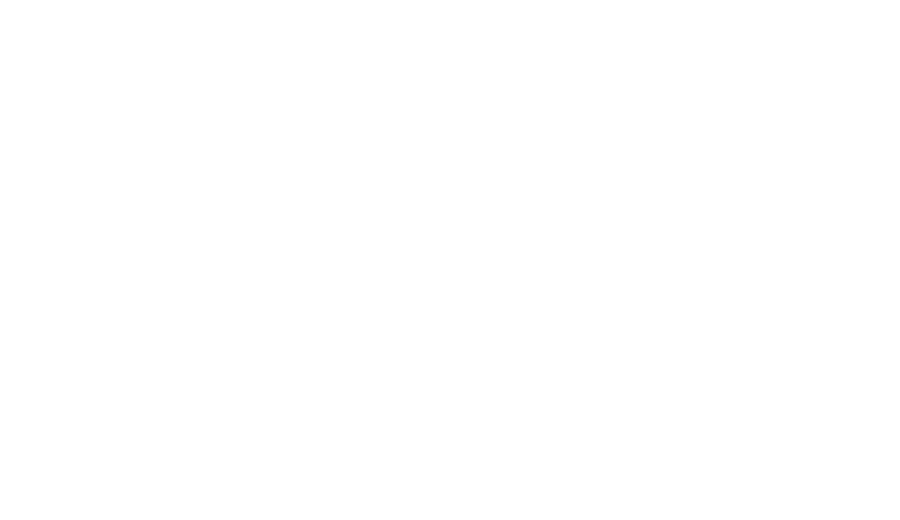

In [20]:
for result in results:
    try:
        # display(Markdown(result[0]))
        reveal(result[1])

        time.sleep(12)
    except Exception as e:
        print(f"Error displaying result: {e}")